In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
from datetime import datetime
from matplotlib import pyplot as plt

data = pd.read_csv('./continuous dataset.csv', delimiter = ',', header = 0,infer_datetime_format=True)

data.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


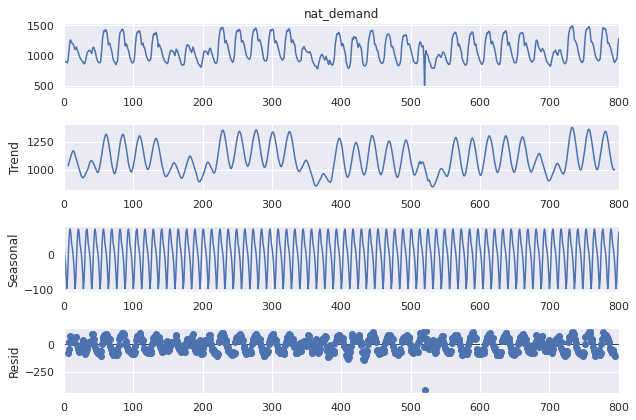

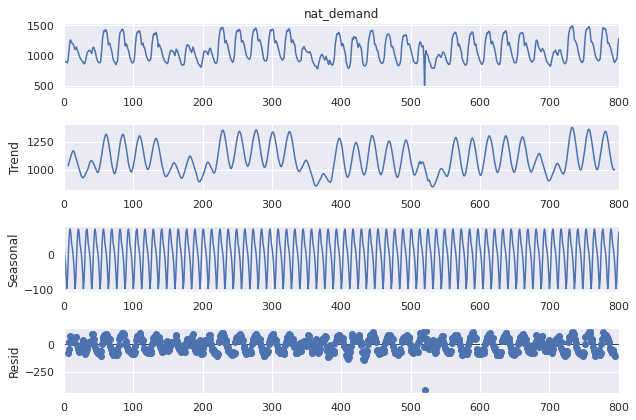

In [96]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(data.loc[:800,'nat_demand'], model='additive', period = 12).plot()
#result.plot()


## Step 1. Choose about 3-6 variables from your dataset (2-3 – target variables, the rest - predictors).

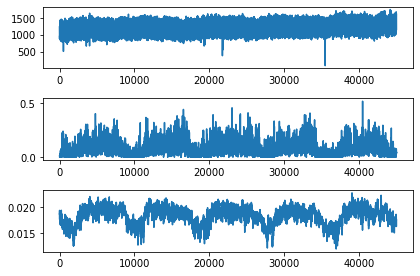

In [2]:
target1, target2, target3 = data.loc[:45000,'nat_demand'], data.loc[:45000,'TQL_toc'], data.loc[:45000,'QV2M_toc']
pr1, pr2, pr3, pr4, pr5, pr6, pr7 = data['T2M_toc'],data['W2M_toc'],data['T2M_san'],data['QV2M_san'],data['W2M_san'],data['T2M_dav'],data['QV2M_dav']

at = {'target1': target1, 'target2': target2, 'target3': target3,
      'pr1:': pr1, 'pr2:': pr2, 'pr3:': pr3,
      'pr4:': pr4, 'pr5:': pr5, 'pr6:': pr6,
      'pr7:': pr7}
Data = pd.DataFrame(data = at)
targets = [target1, target2, target3]

fig, ax = plt.subplots(3)
sns.set(rc={'figure.figsize': (9, 6)})
ax[0].plot(target1)
ax[1].plot(target2)
ax[2].plot(target3)
fig.tight_layout()
fig.savefig('./plot1.png')

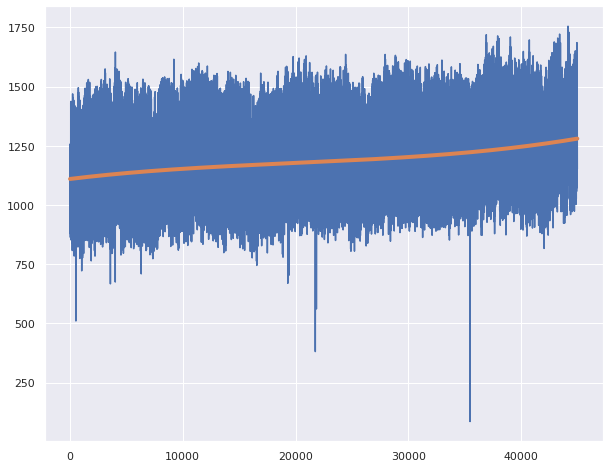

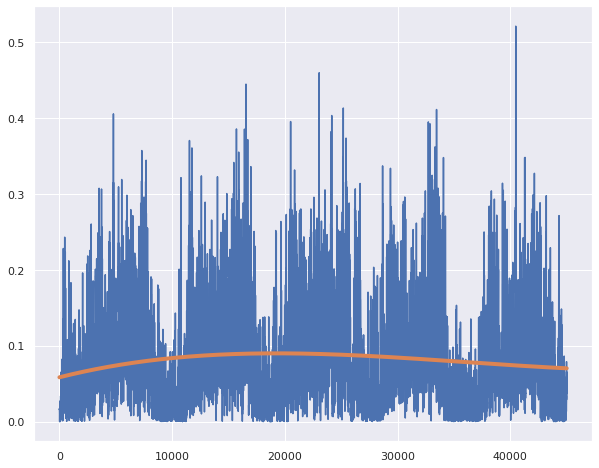

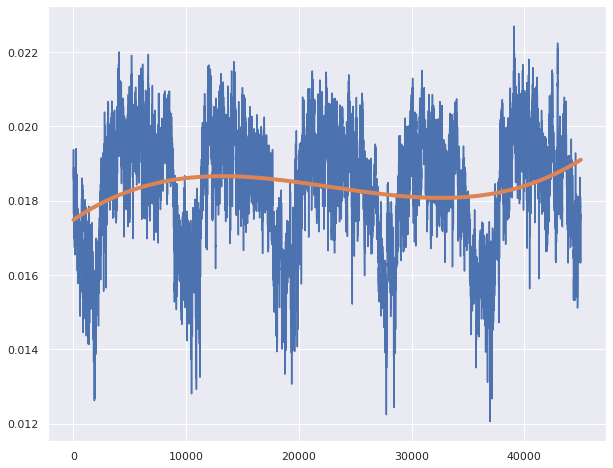

In [3]:
def trendline(data, order):
    trend = np.polyfit(data.index.values, list(data), order)
    return np.poly1d(trend)(data.index.values)
i=2
for target in targets:
    trend = trendline(target, 3)
    plt.subplots(figsize=((10,8)))
    plt.plot(target)
    plt.plot(trend, linewidth=4)
    plt.savefig(f'./plot{i}.png')
    plt.show()
    i+=1

## Step 2. Analyze stationarity of a process (for mathematical expectation and variance) for all chosen variables. Make them more stationary if needed.

In [5]:
from statsmodels.tsa.stattools import adfuller
def stationar_test(target):
  test = adfuller(target)
  return(test[1])

print('For target1 p-value =',stationar_test(target1))
print('For target2 p-value =',stationar_test(target2))
print('For target3 p-value =',stationar_test(target3))
#ALL VARIABLES ARE STATIONARY

For target1 p-value = 0.0
For target2 p-value = 2.679413922714481e-26
For target3 p-value = 1.3000221278875344e-12


## Step 3. Analyze covariance or correlation function for chosen target variables and mutual correlation functions among predictors and targets.

/home/alex/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


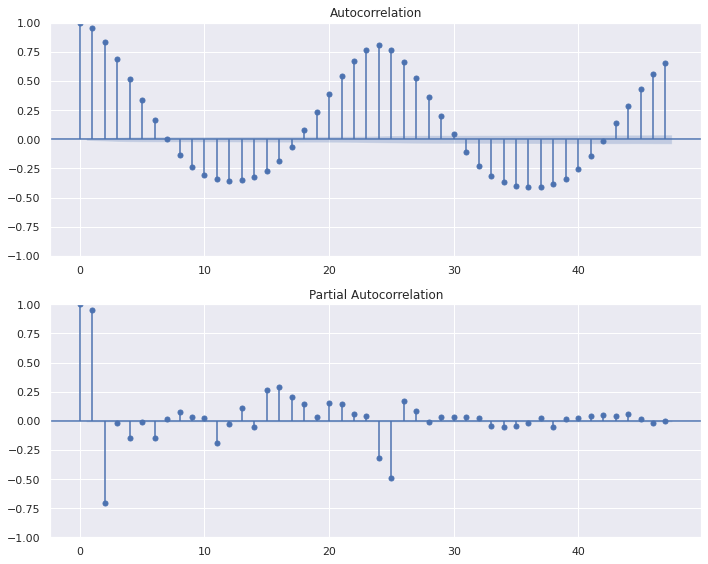

/home/alex/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


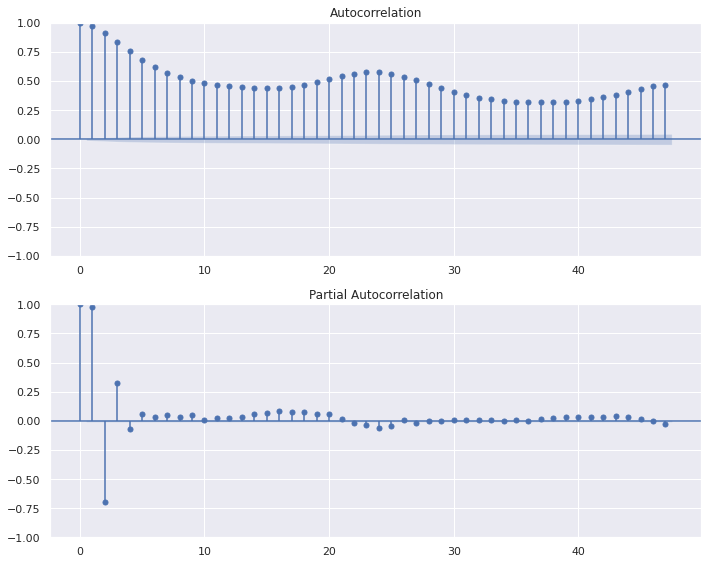

/home/alex/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


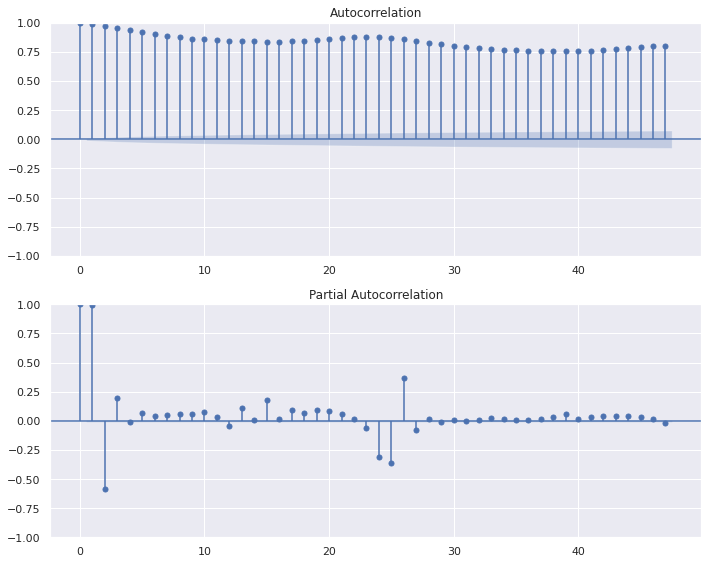

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
i=5
for target in targets:  
    fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8))
    plot_acf(target, ax = ax1)
    plot_pacf(target, ax = ax2)
    fig.savefig(f'./plot{i}')
    plt.tight_layout()
    plt.show()
    i+=1

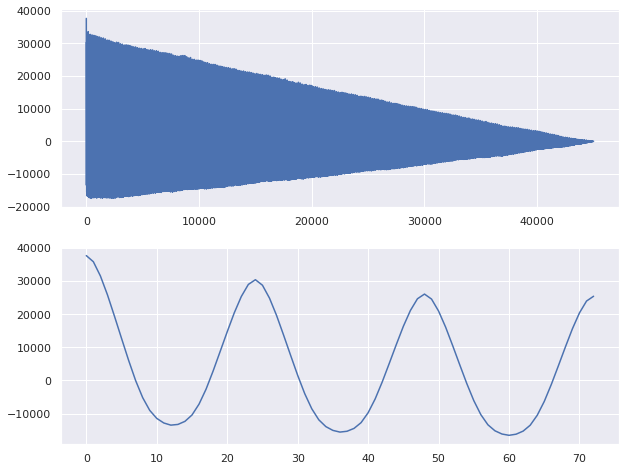

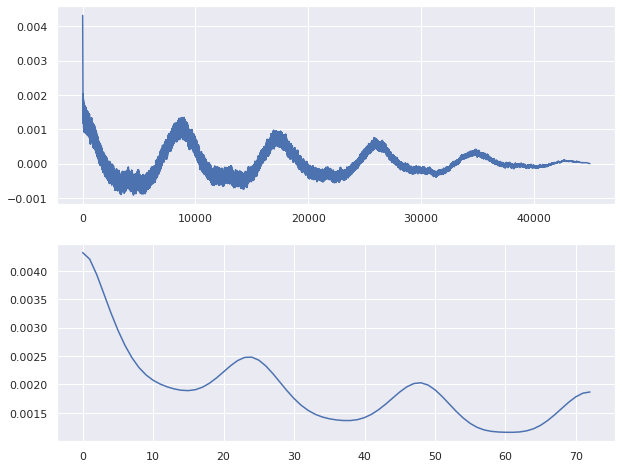

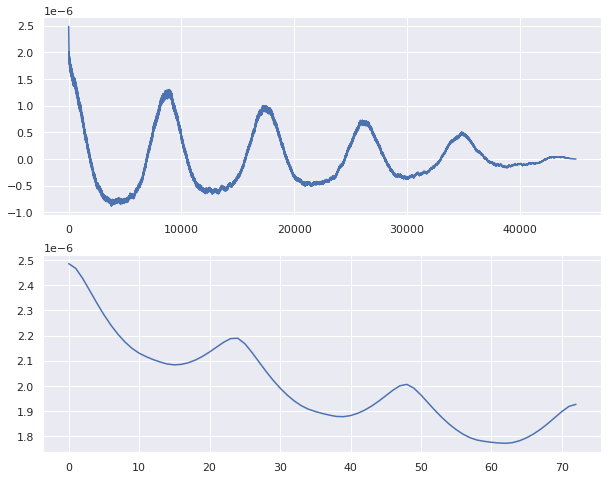

In [5]:
from statsmodels.tsa import stattools
N=72
for target in targets:  
    fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8))
    ax1.plot(stattools.acovf(target,fft=False))
    ax2.plot(stattools.acovf(target, nlag=N, fft=False))
    plt.savefig(f'./plot{i}.png')
    i+=1

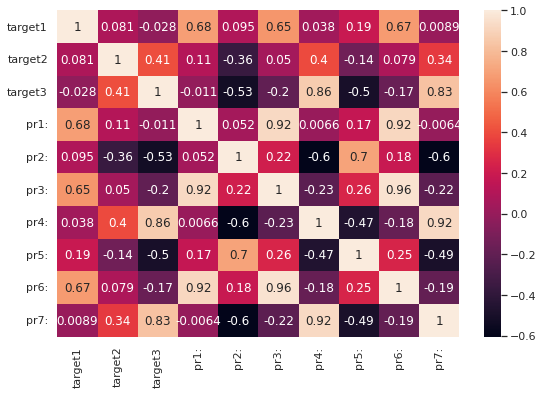

In [6]:
sns.heatmap(Data.corr(method='pearson'), annot=True)
plt.savefig(f'./plot{i}.png')
i+=1

**All target variables have 24-hours variability**

## Step 4. Filter high frequencies (noise) with chosen 2 filters for target variables.

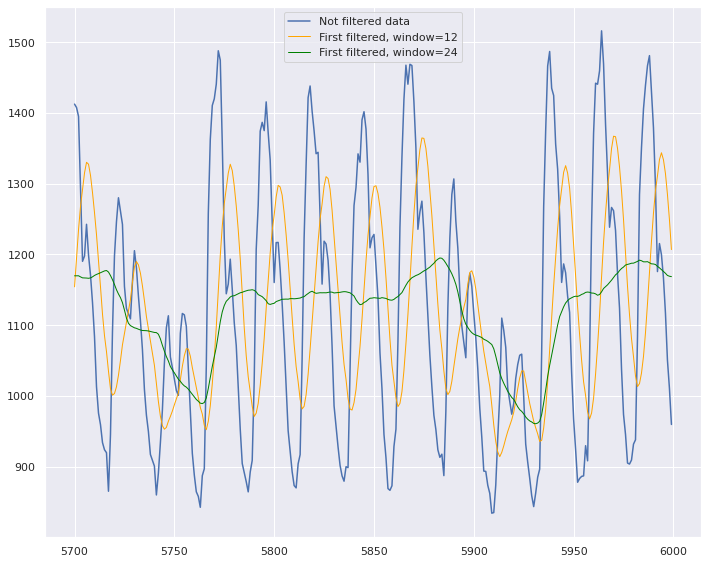

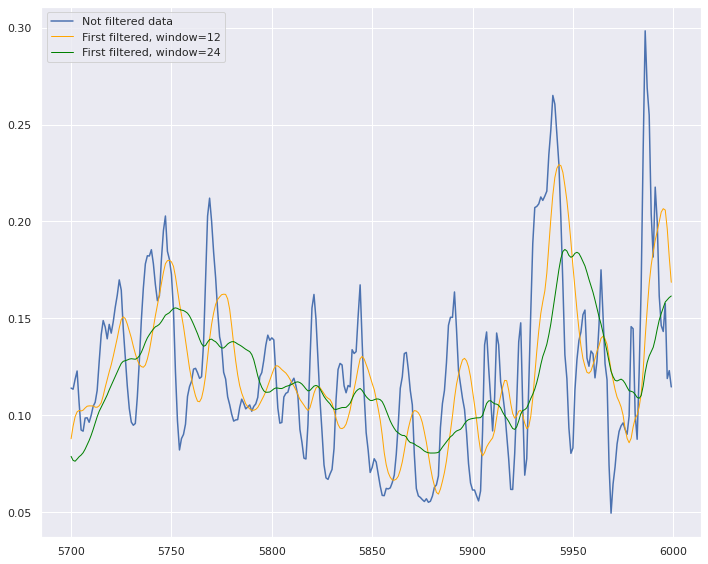

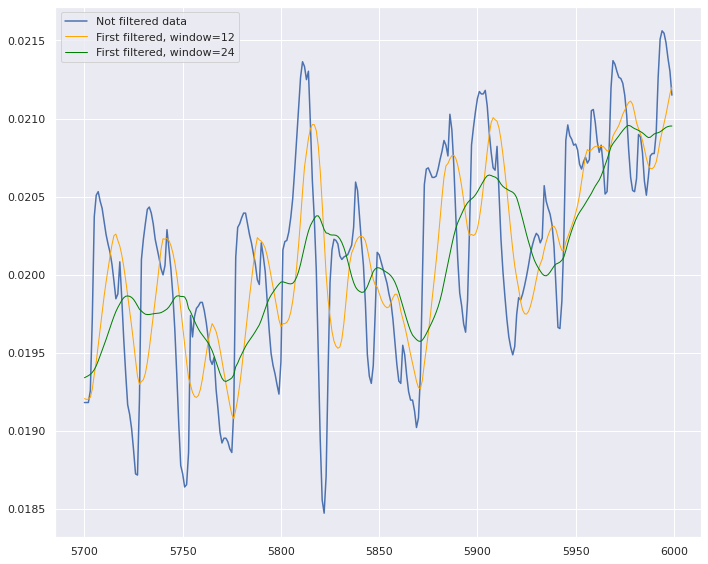

In [7]:
w1, w2 = 24, 12
for target in targets:
    fig = plt.subplots(figsize=(10,8))
    rol_mean1 = target.rolling(w1).mean()
    rol_mean2 = target.rolling(w2).mean()
    plt.plot(target[5700:6000], label = 'Not filtered data')
    plt.plot(rol_mean2[5700:6000], linewidth=1, c = 'orange',label = f'First filtered, window={w2}')
    plt.plot(rol_mean1[5700:6000], linewidth=1, c = 'green', label = f'First filtered, window={w1}')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'./plot{i}.png')
    i+=1

## Step 5. Estimate spectral density function for with and without filtering.

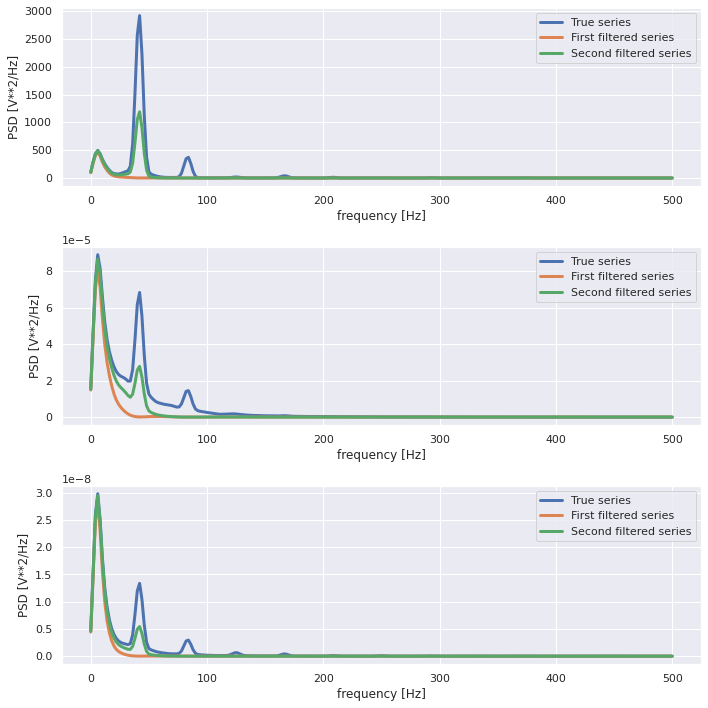

In [76]:
# Estimating spectral density function for with and without filtering
from scipy import signal

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))
for ax, target in zip(axes,targets):
    f, pxx = signal.welch(target, fs = 1000, nfft = 500, nperseg = 200)
    rol_mean1 = target.rolling(w1).mean()
    rol_mean2 = target.rolling(w2).mean()
    ff1, pxx_f1 = signal.welch(rol_mean1.dropna(), fs = 1000, nfft=500, nperseg=200)
    ff2, pxx_f2 = signal.welch(rol_mean2.dropna(), fs = 1000, nfft=500, nperseg=200)
    ax.plot(f, pxx, linewidth=3, label='True series')
    ax.plot(ff1, pxx_f1, linewidth=3, label='First filtered series')
    ax.plot(ff2, pxx_f2, linewidth=3, label='Second filtered series')
    ax.set_xlabel('frequency [Hz]')
    ax.set_ylabel('PSD [V**2/Hz]') #Power spectral density
    ax.legend()
fig.tight_layout()
fig.savefig('./spectral density func.png')  
i+=1

## Step 6. Built auto-regression model filtered and non-filtered data. To analyze residual error and to define appropriate order of model.

In [ ]:
!pip install pmdarima

In [166]:
!pip install fedot

Name: fedot
Version: 0.6.0
Summary: Automated machine learning framework for composite pipelines
Home-page: https://github.com/nccr-itmo/FEDOT
Author: NSS Lab
Author-email: itmo.nss.team@gmail.com
License: BSD 3-Clause
Location: /home/alex/.local/lib/python3.10/site-packages
Requires: anytree, catboost, ete3, func-timeout, hyperopt, joblib, lightgbm, matplotlib, networkx, numpy, pandas, psutil, pytest, pyvis, requests, SALib, scikit-learn, scikit-learn, scikit-optimize, seaborn, statsmodels, testfixtures, tqdm, typing, xgboost
Required-by: 


In [36]:
from pmdarima.arima import auto_arima


discover = auto_arima(targets[0], stepwise = False, seasonal = False, trace = True)
discover.summary()

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=529641.522, Time=2.46 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=507129.158, Time=9.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=504131.591, Time=14.74 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=501285.477, Time=17.41 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=501078.540, Time=22.67 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=501027.672, Time=28.92 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=502299.093, Time=1.42 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=501680.483, Time=6.96 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=501622.043, Time=9.52 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=501087.677, Time=35.26 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=50.27 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=501733.298, Time=1.86 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=501385.616, Time=28.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=72.20 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=492174.813, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                48048
Model:               SARIMAX(2, 1, 3)   Log Likelihood             -246080.406
Date:                Wed, 30 Nov 2022   AIC                         492174.813
Time:                        21:44:09   BIC                         492236.272
Sample:                             0   HQIC                        492194.100
                              - 48048                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -4.741e-05      0.008     -0.006      0.995      -0.015       0.015
ar.L1          1.9010      0.002   1069.476      0.000       1.898       1.905
ar.L2         -0.9673      0.002   -567.886      0.000      -0.971      -0.964
ma.L1         -1.3779      0.002   -758.293      0.000      -1.381      -1.374
ma.L2         -0.0132      0.003     -3.892      0.000      -0.020      -0.007
ma.L3          0.4312      0.003    151.766      0.000       0.426       0.437
sigma2      1644.7894      3.452    476.429      0.000    1638.023    1651.556
===================================================================================
Ljung-Box (L1) (Q):                  25.21   Jarque-Bera (JB):           2053658.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

44979
22


/home/alex/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/alex/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/alex/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


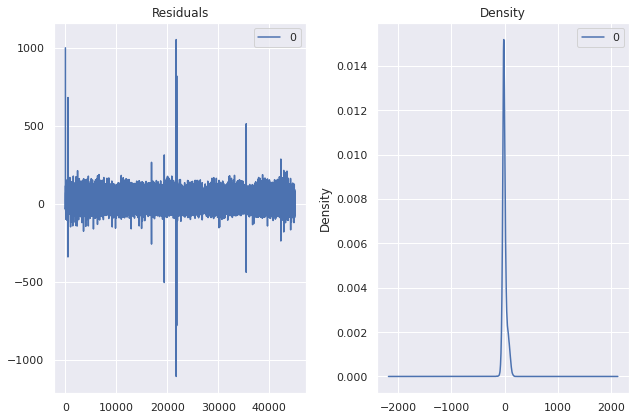

In [11]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA

test, train = train_test_split(targets[0], test_size=0.9995, shuffle = False, random_state=42)
print(len(train))
print(len(test))

model = ARIMA(train, order=(2,1,3))
fitted = model.fit()


residuals = pd.DataFrame(fitted.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.tight_layout()
plt.savefig(f'./plot{i}.png')
plt.show()
i+=1

/home/alex/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


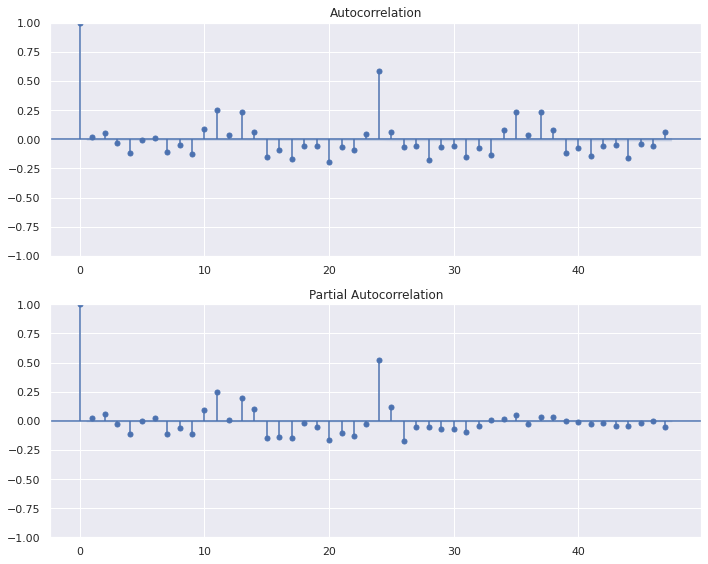

In [12]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8))
plot_acf(residuals, ax = ax1)
plot_pacf(residuals, ax = ax2)
fig.savefig(f'./plot{i}')
plt.tight_layout()
plt.show()
i+=1

/home/alex/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


mae: 267.8151029087226
mape: 0.25674067067028933
rmse: 275.3800846069187


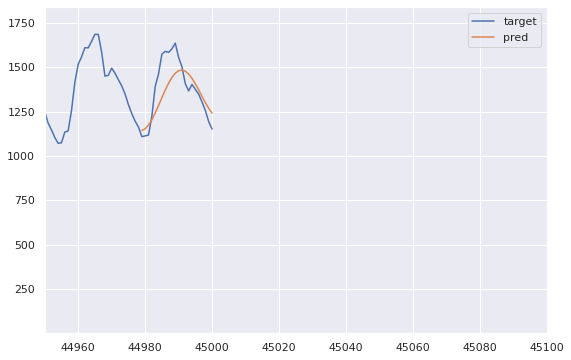

In [14]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

forecast_test = fitted.forecast(len(test))
fc = pd.Series([None]*len(train) + list(forecast_test))

d = {'target': targets[0], 'pred': fc}
df = pd.DataFrame(d)

df.plot()
plt.xlim(44950,45100)
plt.savefig(f'./plot{i}.png')

mae = mean_absolute_error(test, forecast_test)
mape = mean_absolute_percentage_error(test, forecast_test)
rmse = np.sqrt(mean_squared_error(test, forecast_test))

print(f'mae: {mae}')
print(f'mape: {mape}')
print(f'rmse: {rmse}')

/home/alex/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/alex/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/alex/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/alex/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


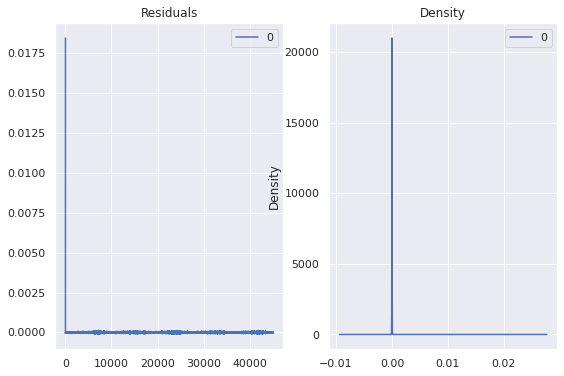

In [75]:
#Now define parameters manually 
rol_mean2 = target.rolling(w2).mean()
rol = pd.DataFrame( data={'rol_mean2': rol_mean2.dropna().reset_index(drop=True)})

test, train = train_test_split(rol, test_size=0.9995, shuffle = False, random_state=42)
model = ARIMA(train, order=(2,1,3))
fitted = model.fit()


residuals = pd.DataFrame(fitted.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.savefig('./ARIMA filtered res.png')
plt.show()

/home/alex/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


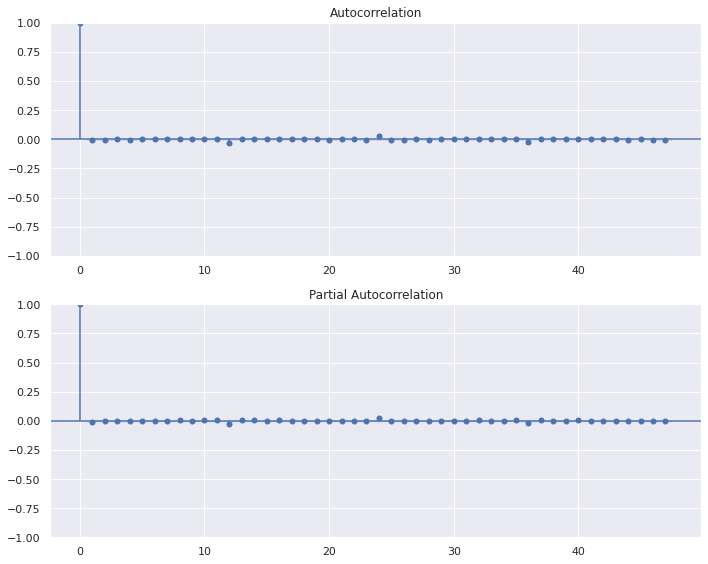

In [73]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8))
plot_acf(residuals, ax = ax1)
plot_pacf(residuals, ax = ax2)
fig.savefig('./ARIMA filtered auto.png')
plt.tight_layout()
plt.show()

/home/alex/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


mae: 0.0009979098104320766
mape: 0.053793799441696336
rmse: 0.0010496439475223343


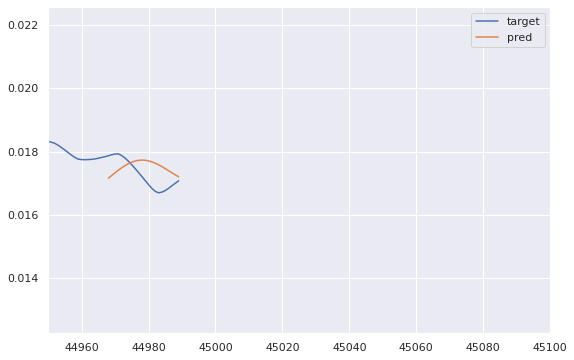

In [74]:
forecast_test = fitted.forecast(len(test))
fc = pd.Series([None]*len(train) + list(forecast_test))

d = {'target': rol['rol_mean2'], 'pred': fc}
df = pd.DataFrame(d)

df.plot()
plt.xlim(44950,45100)
plt.savefig('./ARIMA fc.png')

mae = mean_absolute_error(test, forecast_test)
mape = mean_absolute_percentage_error(test, forecast_test)
rmse = np.sqrt(mean_squared_error(test, forecast_test))

print(f'mae: {mae}')
print(f'mape: {mape}')
print(f'rmse: {rmse}')

## Step 7. Build model in a form of linear dynamical system, using chosen predictors. To analyze residual error and to define appropriate order of model.

In [6]:
from fedot.core.data.multi_modal import MultiModalData
from fedot.core.data.data import InputData
from fedot.core.pipelines.pipeline import Pipeline
from fedot.core.pipelines.node import PrimaryNode, SecondaryNode
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams
from fedot.core.data.data_split import train_test_data_setup

def wrap_into_input(forecast_length, feature_time_series, target_time_series):
    """ Convert data for FEDOT framework """
    task = Task(TaskTypesEnum.ts_forecasting,
                TsForecastingParams(forecast_length=forecast_length))
    
    input_data = InputData(idx=np.arange(0, len(target_time_series)),
                           features=feature_time_series, target=target_time_series,
                           task=task, data_type=DataTypesEnum.ts)
    
    return input_data


forecast_length = 200

ts_1 = wrap_into_input(forecast_length=forecast_length, 
                       feature_time_series=np.array(data['nat_demand']),
                       target_time_series=np.array(data['nat_demand']))

train_ts_1, test_ts_1 = train_test_data_setup(ts_1)

ts_2 = wrap_into_input(forecast_length=forecast_length, 
                       feature_time_series=np.array(data['T2M_toc']),
                       target_time_series=np.array(data['nat_demand']))

train_ts_2, test_ts_2 = train_test_data_setup(ts_2)

dataset = MultiModalData({
    'data_source_ts/nat_demand': ts_1,
    'data_source_ts/T2M_toc': ts_2
})

2022-12-01 14:17:58,179 - OperationTypesRepository - Operation lagged not found in the repository


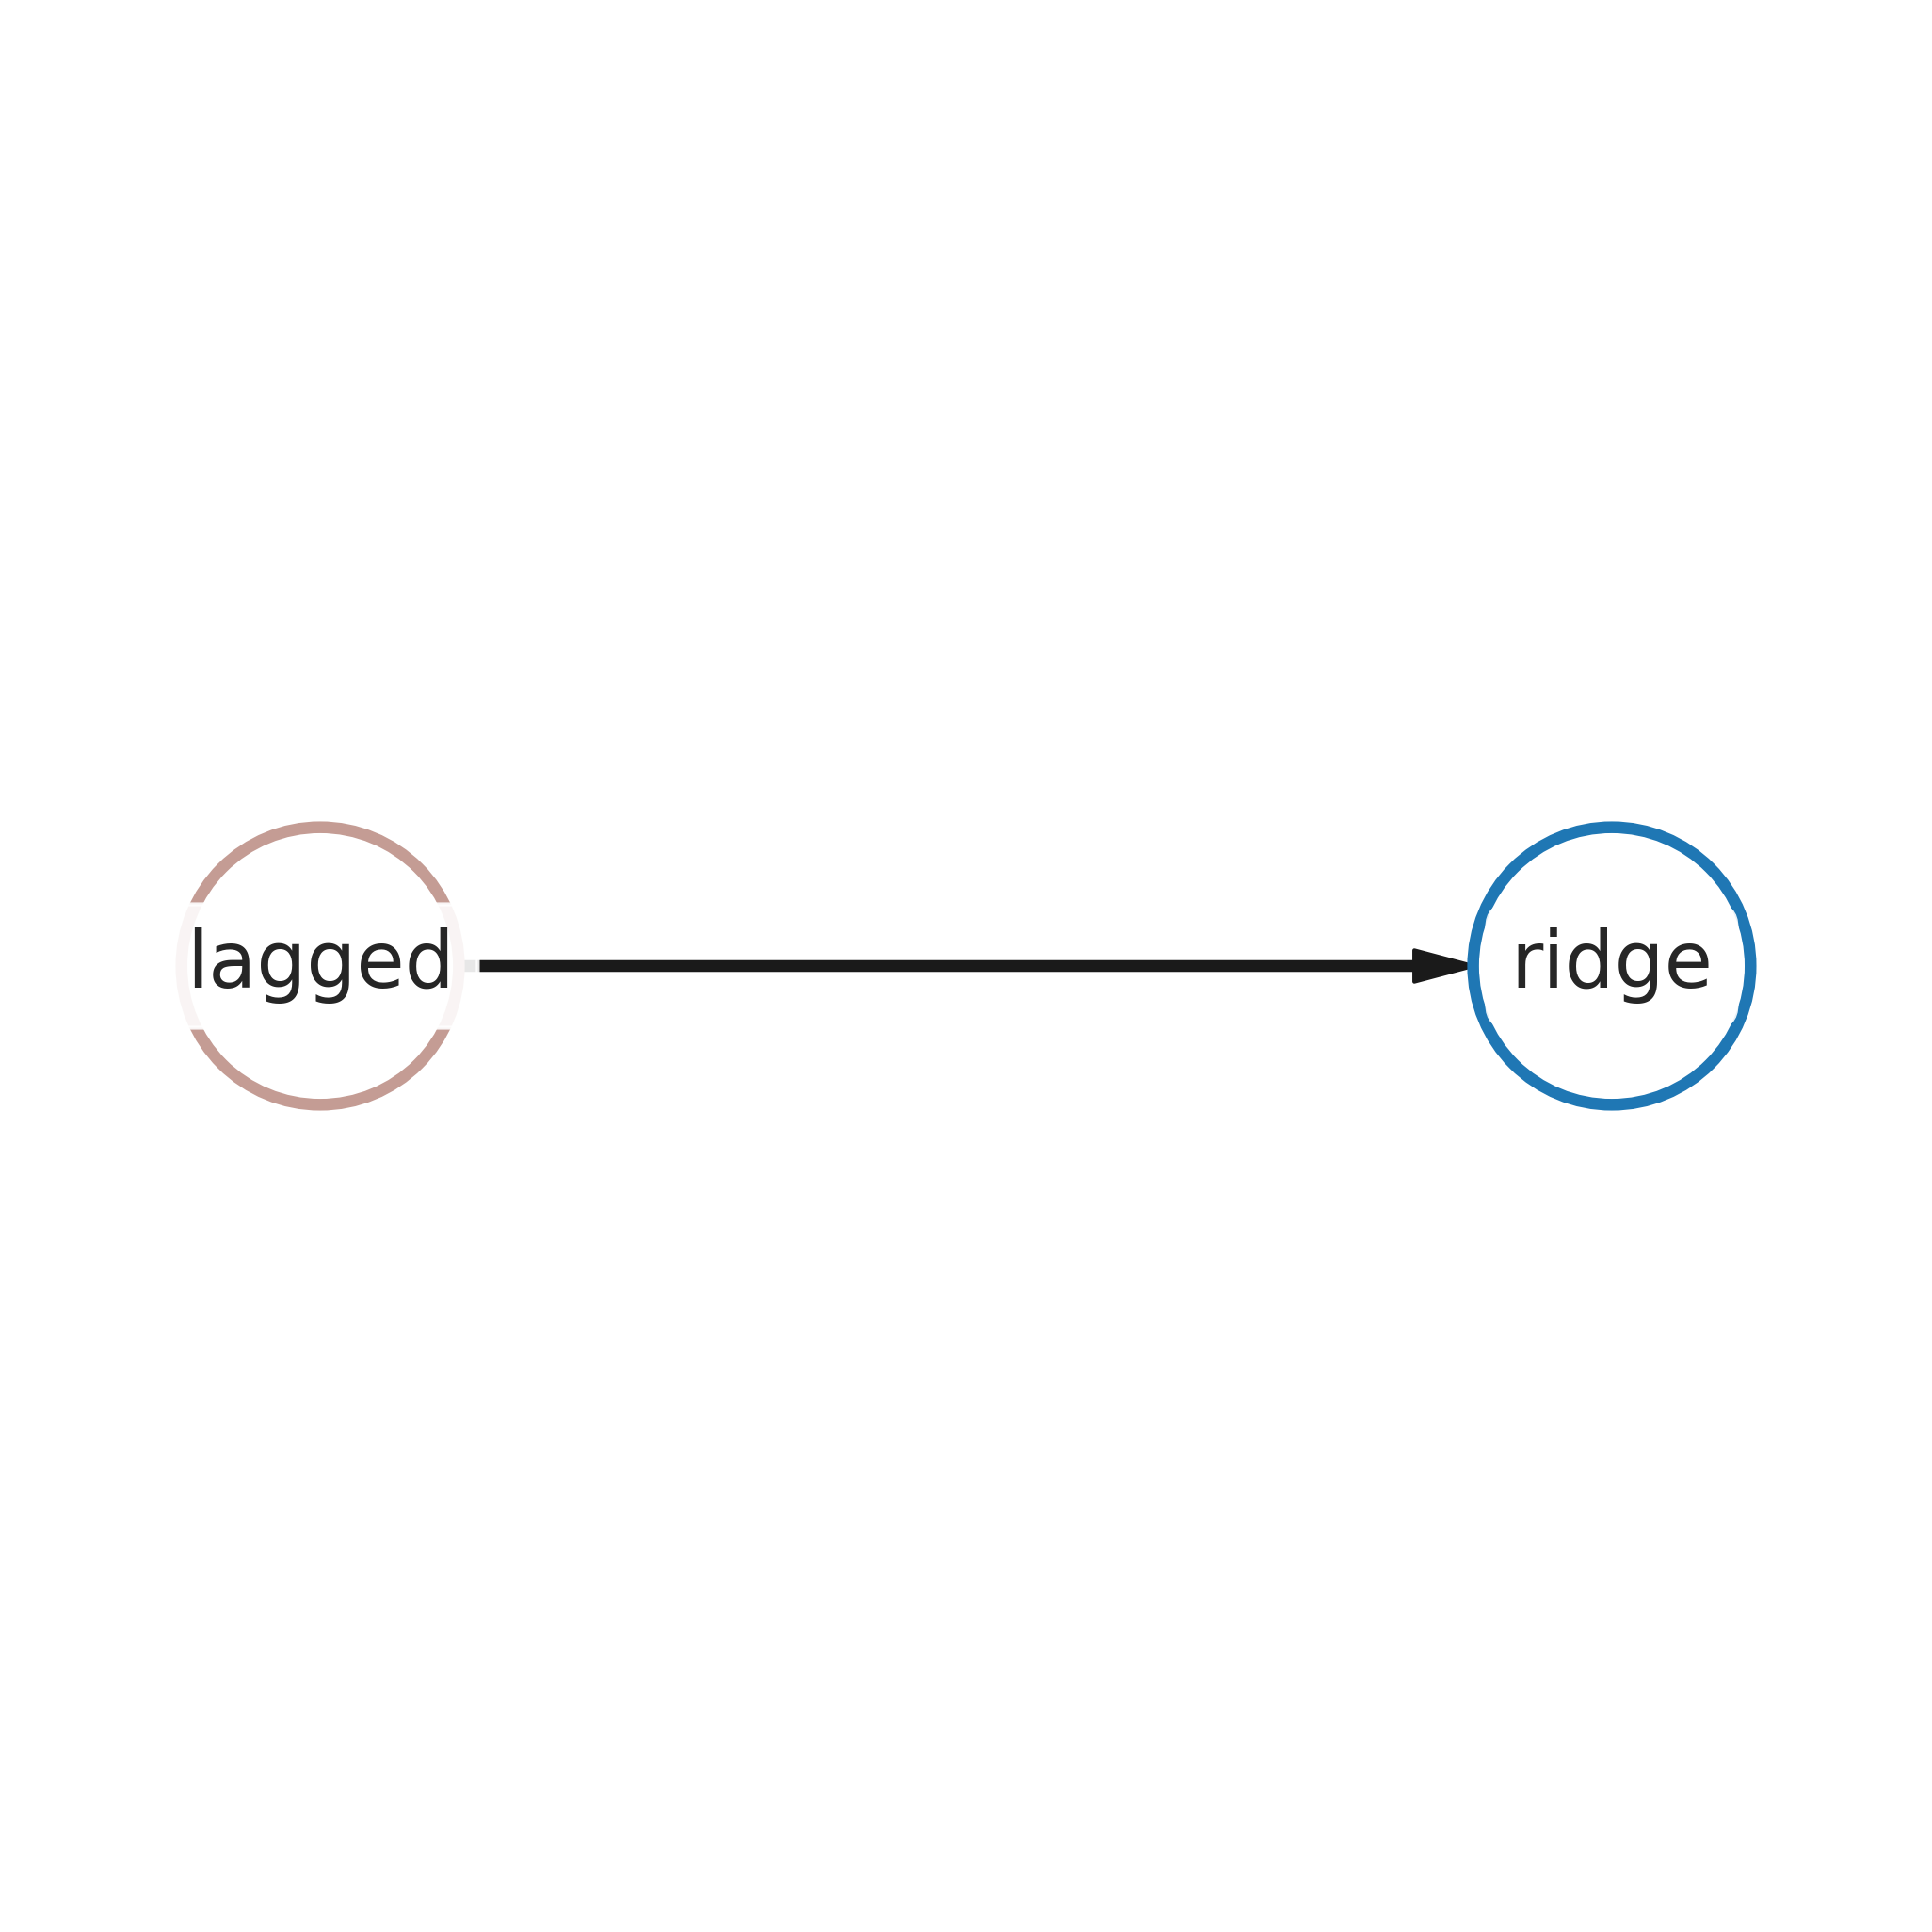

In [18]:
def simple_linear_pipeline():
    """ Pipeline lagged -> ridge """
    lagged_node = PrimaryNode('lagged')  
    ridge_node = SecondaryNode('ridge', nodes_from=[lagged_node])
    return Pipeline(ridge_node)

simple_pipeline = simple_linear_pipeline()
simple_pipeline.show()
simple_pipeline.fit(train_ts_1)
forecast_uni = simple_pipeline.predict(test_ts_1)

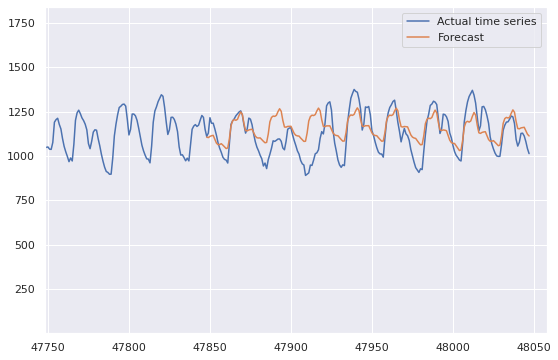

In [23]:
train_length = len(data['nat_demand']) - forecast_length

plt.plot(data['nat_demand'], label='Actual time series')
plt.plot(np.arange(train_length, train_length + forecast_length), 
         np.ravel(forecast_uni.predict), label='Forecast')
plt.xlim(train_length - 100, len(data['nat_demand']) + 10)
plt.legend()
plt.savefig('./plot_uni.png')
plt.show()

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
MAE = mean_absolute_error(test_ts_1.target, np.ravel(forecast_uni.predict))
MAPE = mean_absolute_percentage_error(test_ts_1.target, np.ravel(forecast_uni.predict))
MSE = mean_squared_error(test_ts_1.target, np.ravel(forecast_uni.predict))
print(f'MAE metric value: {MAE:.2f} \n', f'MAPE metric value: {MAPE:.2f} \n', f'MAE metric value: {MSE:.2f} \n')

MAE metric value: 78.60 
 MAPE metric value: 0.07 
 MAE metric value: 9689.31 



2022-12-01 15:43:07,118 - OperationTypesRepository - Operation lagged not found in the repository
2022-12-01 15:43:07,120 - OperationTypesRepository - Operation data_source_ts not found in the repository
2022-12-01 15:43:07,120 - OperationTypesRepository - Operation lagged not found in the repository
2022-12-01 15:43:07,121 - OperationTypesRepository - Operation data_source_ts not found in the repository


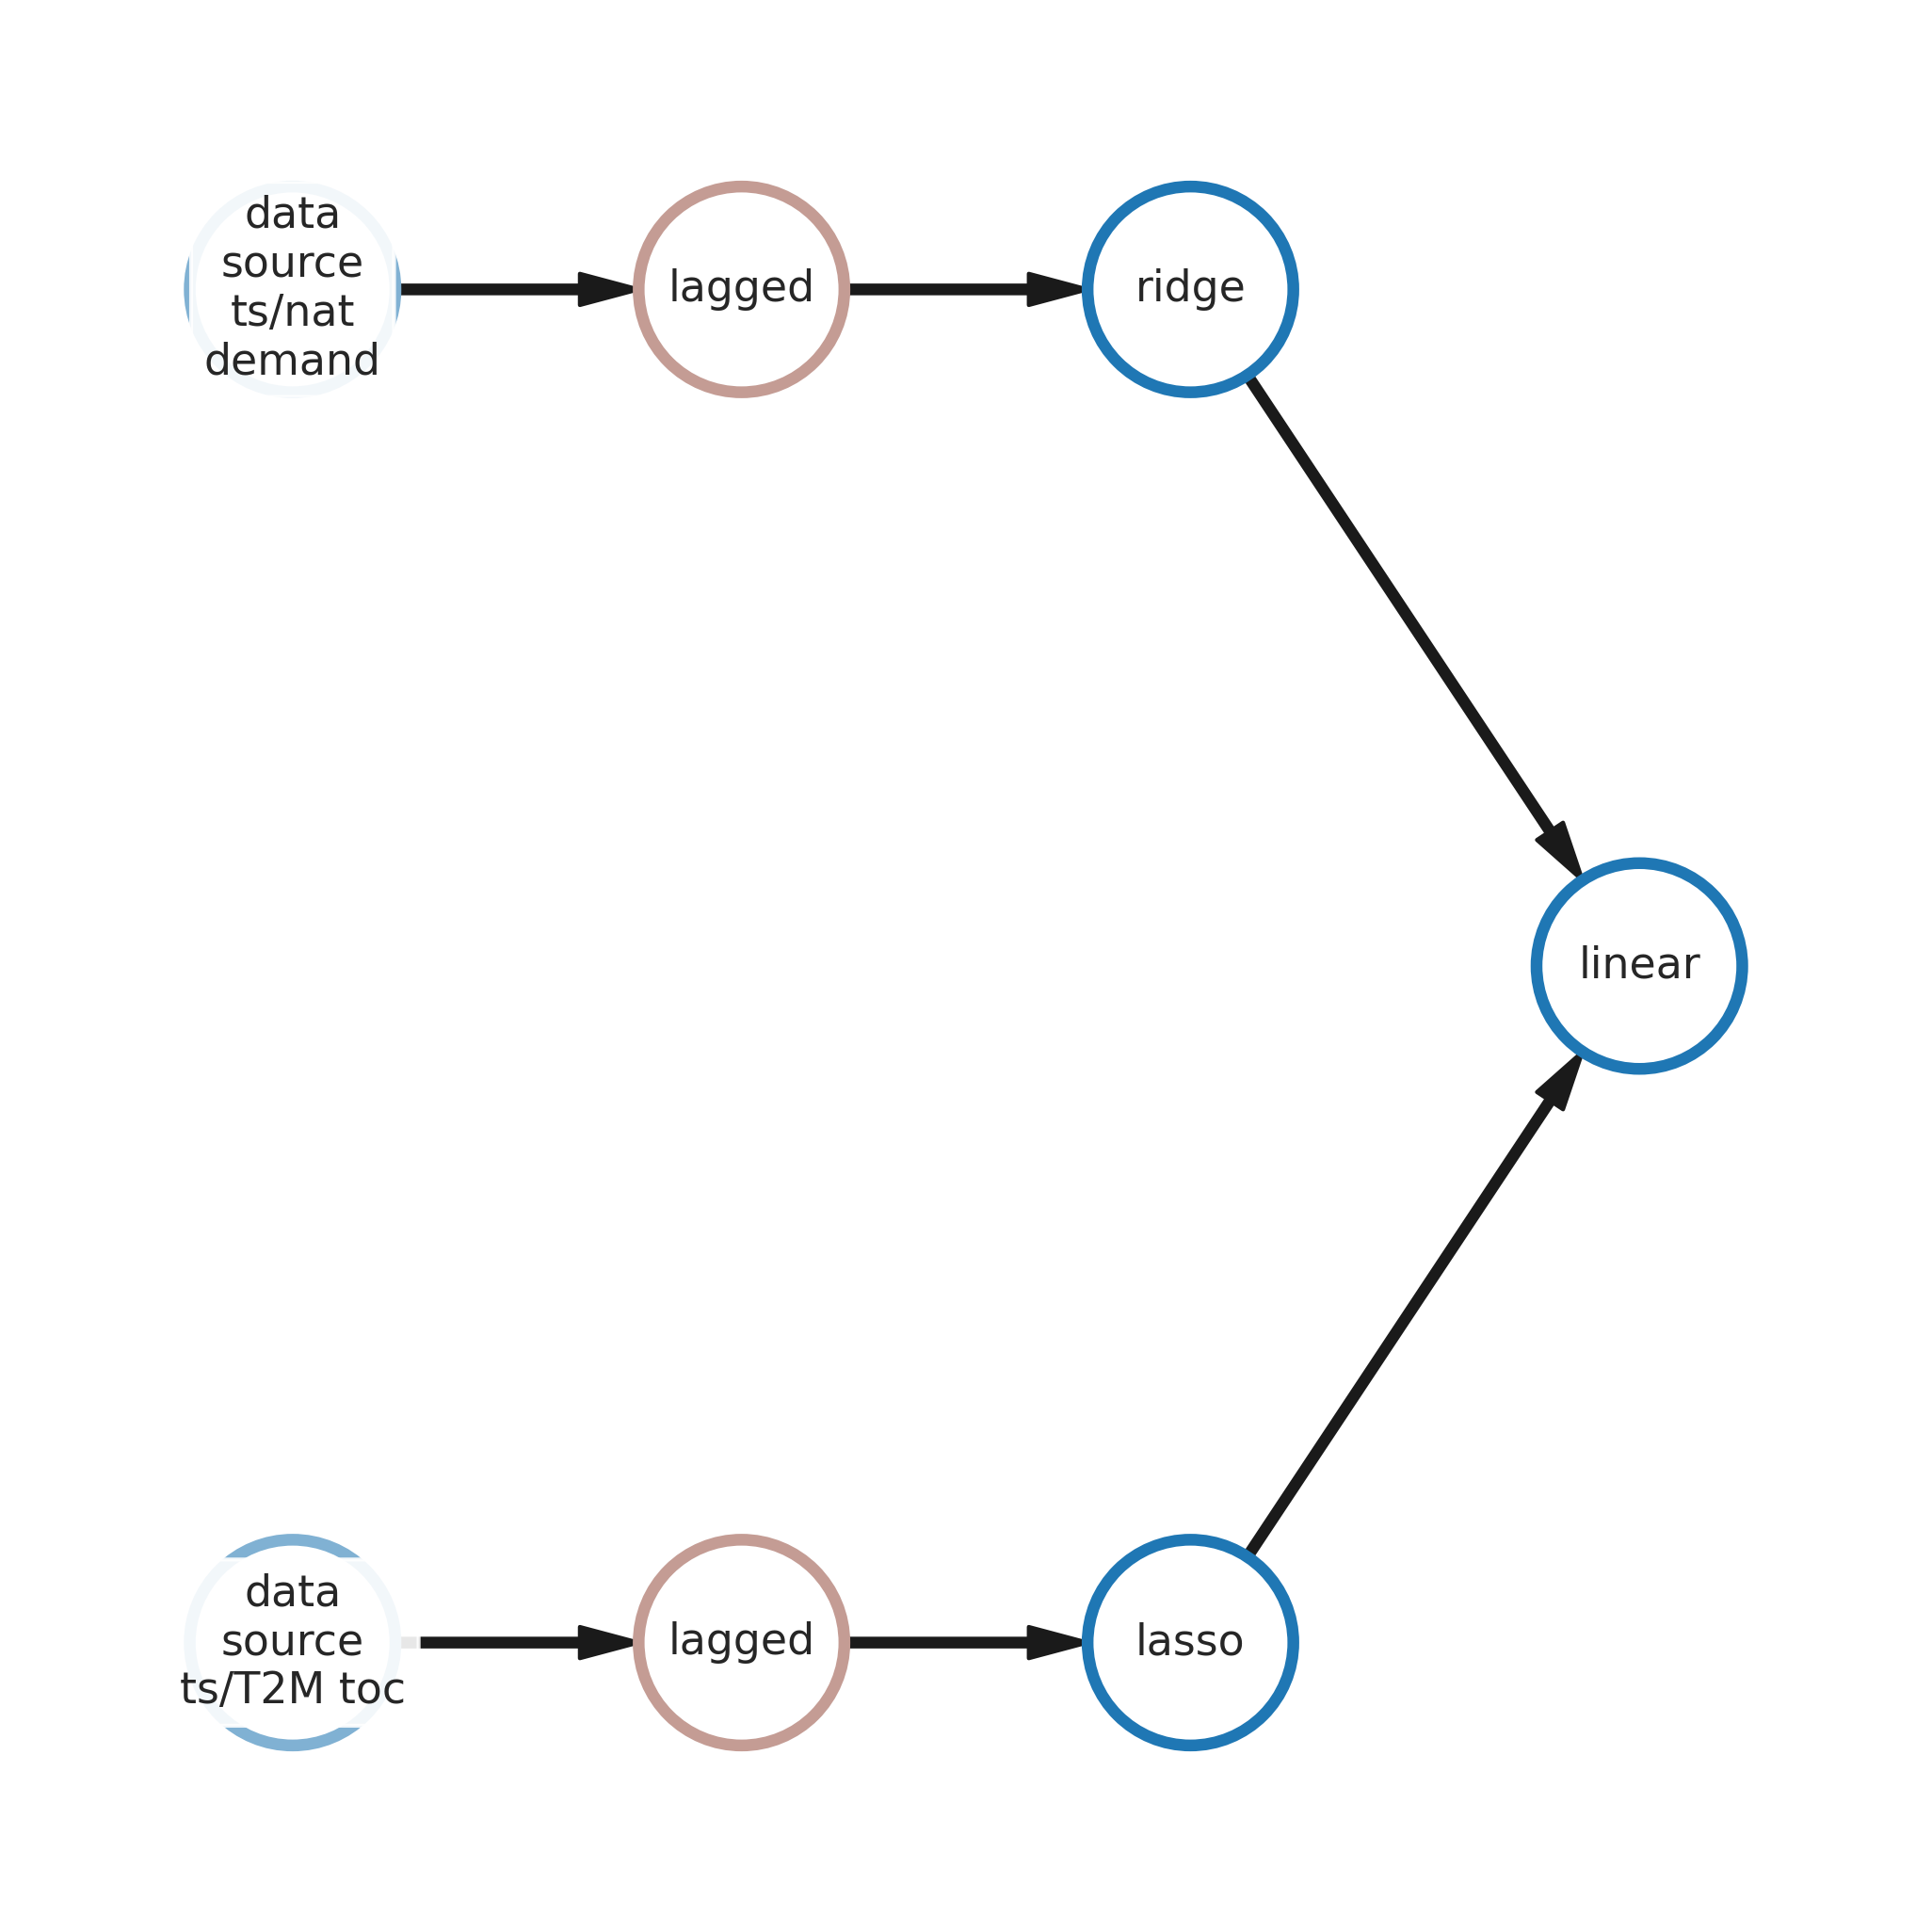

<Figure size 648x432 with 0 Axes>

In [22]:
def create_multisource_pipeline():
    """ Generate pipeline with several data sources """
    node_source_1 = PrimaryNode('data_source_ts/nat_demand')
    node_source_2 = PrimaryNode('data_source_ts/T2M_toc')

    node_lagged_1 = SecondaryNode('lagged', nodes_from=[node_source_1])
    node_lagged_1.custom_params = {'window_size': 150}
    node_lagged_2 = SecondaryNode('lagged', nodes_from=[node_source_2])
      
    node_ridge = SecondaryNode('ridge', nodes_from=[node_lagged_1])
    node_lasso = SecondaryNode('lasso', nodes_from=[node_lagged_2])
    
    node_final = SecondaryNode('linear', nodes_from=[node_ridge, node_lasso])
    pipeline = Pipeline(node_final)
    return pipeline

pipeline = create_multisource_pipeline()
pipeline.show()

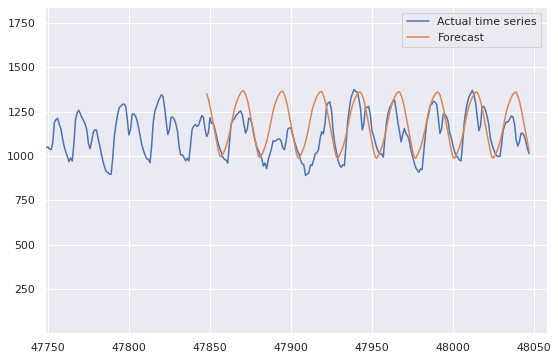

In [25]:
pipeline.fit(train_ts_2)
forecast_multi = pipeline.predict(test_ts_2)

train_length = len(data['nat_demand']) - forecast_length

plt.plot(data['nat_demand'], label='Actual time series')
plt.plot(np.arange(train_length, train_length + forecast_length), 
         np.ravel(forecast_multi.predict), label='Forecast')
plt.xlim(train_length - 100, len(data['nat_demand']) + 10)
plt.legend()
plt.savefig('./plot_multi.png')
plt.show()

In [16]:
MAE = mean_absolute_error(test_ts_2.target, np.ravel(forecast_multi.predict))
MAPE = mean_absolute_percentage_error(test_ts_2.target, np.ravel(forecast_multi.predict))
MSE = mean_squared_error(test_ts_2.target, np.ravel(forecast_multi.predict))
print(f'MAE metric value: {MAE:.2f} \n', f'MAPE metric value: {MAPE:.2f} \n', f'MAE metric value: {MSE:.2f} \n')

MAE metric value: 92.90 
 MAPE metric value: 0.09 
 MAE metric value: 15285.90 

